In [1]:
### Simple chatbot using langgraph

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

# Reducers
from langgraph.graph.message import add_messages

from typing import Annotated

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [5]:
from langchain_groq import ChatGroq

model = ChatGroq(model = "gemma2-9b-it")
model.invoke("Hey suggest me some movies")


AIMessage(content="Please tell me more about what you're looking for! To give you the best movie suggestions, I need some information about your preferences. \n\nFor example, tell me:\n\n* **What genres do you enjoy?** (e.g., comedy, action, sci-fi, romance, horror, documentary)\n* **Are you looking for something lighthearted or thought-provoking?**\n* **Do you have any favorite directors or actors?**\n* **Is there a specific mood you're in?** (e.g., happy, sad, excited)\n* **Have you seen any movies recently that you liked or disliked?**\n\n\nThe more information you give me, the better I can tailor my suggestions to your taste! 🎬🍿 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 14, 'total_tokens': 176, 'completion_time': 0.294545455, 'prompt_time': 0.001262289, 'queue_time': 0.251733591, 'total_time': 0.295807744}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason

### We will start with creating Nodes


In [6]:
def superbot(state:State):
    return {"messages":[model.invoke(state["messages"])]}

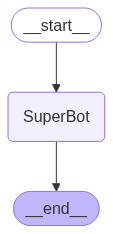

In [7]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("SuperBot",superbot)
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
graph_builder.invoke({"messages": "Hi my name is Ishank"})

{'messages': [HumanMessage(content='Hi my name is Ishank', additional_kwargs={}, response_metadata={}, id='72aaaea2-529c-4977-a0f4-d9b6adacb3ae'),
  AIMessage(content="Hi Ishank, it's nice to meet you! 👋\n\nWhat can I do for you today? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 15, 'total_tokens': 43, 'completion_time': 0.050909091, 'prompt_time': 0.00124899, 'queue_time': 0.250565639, 'total_time': 0.052158081}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e59516b-a4da-4739-a7a0-715c99275fcd-0', usage_metadata={'input_tokens': 15, 'output_tokens': 28, 'total_tokens': 43})]}

In [9]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

# Reducers
from langgraph.graph.message import add_messages

from typing import Annotated

In [10]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [12]:
from langchain_groq import ChatGroq

model = ChatGroq(model = "gemma2-9b-it")
model.invoke("Hey suggest me some movies")


AIMessage(content='I can definitely suggest some movies! To give you the best recommendations, tell me:\n\n**1. What genres do you enjoy?** (e.g., comedy, action, sci-fi, horror, romance, documentary)\n\n**2. Are you looking for something lighthearted or thought-provoking?**\n\n**3. Any particular actors or directors you like?**\n\n**4. Have you seen any movies recently that you really enjoyed?**  \n\nThe more information you give me, the better I can tailor my suggestions to your taste! 🍿🎬  \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 14, 'total_tokens': 135, 'completion_time': 0.22, 'prompt_time': 0.00124932, 'queue_time': 0.251480675, 'total_time': 0.22124932}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--70ca9592-4ebf-45d2-930f-206fc54baf5c-0', usage_metadata={'input_tokens': 14, 'output_tokens': 121, 'total_tokens':

### We will start with creating Nodes


In [13]:
def superbot(state:State):
    return {"messages":[model.invoke(state["messages"])]}

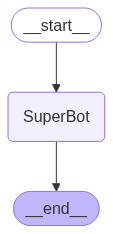

In [14]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("SuperBot",superbot)
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
graph_builder.invoke({"messages": "Hi my name is Ishank"})

{'messages': [HumanMessage(content='Hi my name is Ishank', additional_kwargs={}, response_metadata={}, id='15fc01d6-08ee-49fb-b603-6603adca9756'),
  AIMessage(content="Hi Ishank, it's nice to meet you! What can I do for you today? 😊  \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 15, 'total_tokens': 40, 'completion_time': 0.045454545, 'prompt_time': 0.001253219, 'queue_time': 0.251705841, 'total_time': 0.046707764}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--82da3e38-a9f8-4b66-888a-05cc0102cac0-0', usage_metadata={'input_tokens': 15, 'output_tokens': 25, 'total_tokens': 40})]}

In [16]:
graph_builder.invoke({"messages": "What's my name "})

{'messages': [HumanMessage(content="What's my name ", additional_kwargs={}, response_metadata={}, id='87e540f7-d441-410f-9e0b-7afd35e51566'),
  AIMessage(content="As an AI, I have no memory of past conversations and do not know your name. If you'd like to tell me your name, I'd be happy to know! 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 15, 'total_tokens': 56, 'completion_time': 0.074545455, 'prompt_time': 0.001260229, 'queue_time': 0.250107676, 'total_time': 0.075805684}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f2bf4b60-d739-469f-94c4-7a6deff15eb4-0', usage_metadata={'input_tokens': 15, 'output_tokens': 41, 'total_tokens': 56})]}

In [17]:
for event in graph_builder.stream({"messages":"My name is Ishank"},stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Ishank, it's nice to meet you! 👋 \n\nIs there anything I can help you with today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 14, 'total_tokens': 42, 'completion_time': 0.050909091, 'prompt_time': 0.001263789, 'queue_time': 0.25263159199999996, 'total_time': 0.05217288}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e4e44ac1-4442-4d82-aa5f-974e8cb8c03f-0', usage_metadata={'input_tokens': 14, 'output_tokens': 28, 'total_tokens': 42})]}}


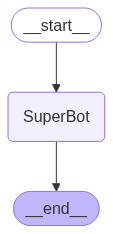


--- Conversation ---
Human: Hi my name is Ishank
Human: Can you tell me what is my name?
Ai: Your name is Ishank.  😊  

Is there anything else I can help you with?


--- Streaming ---
{'SuperBot': {'messages': [{'role': 'assistant', 'content': 'Your name is Ishank.  😊 \n\nI remember that you told me!  \n'}]}}


In [18]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated

# Load environment variables
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Load model
from langchain_groq import ChatGroq
model = ChatGroq(model="gemma2-9b-it")  # You can use "gemma2-9b-it" if available

# Define state type with reducer
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Define chatbot node
def superbot(state: State):
    response = model.invoke(state["messages"])  # Use full history
    return {
        "messages": [{"role": "assistant", "content": response.content}]
    }

# Build graph
graph = StateGraph(State)
graph.add_node("SuperBot", superbot)
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()

# Optionally visualize the graph (if running in notebook)
try:
    from IPython.display import Image, display
    display(Image(graph_builder.get_graph().draw_mermaid_png()))
except:
    pass

# ✅ Run conversation
initial_input = {
    "messages": [
        {"role": "user", "content": "Hi my name is Ishank"},
        {"role": "user", "content": "Can you tell me what is my name?"}
    ]
}

response = graph_builder.invoke(initial_input)

# Print full message history
print("\n--- Conversation ---")
for msg in response["messages"]:
    print(f"{msg.type.capitalize()}: {msg.content}")


# ✅ Optional: Stream version
print("\n--- Streaming ---")
for event in graph_builder.stream(initial_input, stream_mode="updates"):
    print(event)


In [19]:
history = [
    {"role": "user", "content": "Hi, my name is Ishank"}
]

# First turn
response = graph_builder.invoke({"messages": history})
history += response["messages"]

# Next turn
history.append({"role": "user", "content": "What is my name?"})
response = graph_builder.invoke({"messages": history})
history += response["messages"]

# Print
for msg in history:
    print(f"{msg.type.capitalize()}: {msg.content}")


AttributeError: 'dict' object has no attribute 'type'

In [ ]:
# ✅ Run conversation
input = {
    "messages": [
        {"role": "user", "content": "Can you tell me what is my name?"}
    ]
}

response = graph_builder.invoke(input)
response

{'messages': [HumanMessage(content='Can you tell me what is my name?', additional_kwargs={}, response_metadata={}, id='7f90651e-975d-48e1-a67b-b69937db9089'),
  AIMessage(content="As an AI, I have no memory of past conversations and do not know your name. If you'd like to tell me your name, I'd be happy to know!\n", additional_kwargs={}, response_metadata={}, id='b05454b1-6403-4ce5-bd71-df019d4051b0')]}